> #### **ISSD - Desarrollo de Sistemas de Inteligencia Artificial**  
> Profesor: Sachi, Julio Mariano  
> Alumno: Garcia Alves, Andrés


> GitHub: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; https://github.com/andres-garcia-alves/issd-dsia/tree/main/Proyecto-Final  
> Notebook: &nbsp; https://colab.research.google.com/drive/1pd5cmNriSxK3FQSHNF0YwUbl6c4cecE0?usp=sharing  
> Deploy: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; https://issd-dsia-andres-garcia-alves.streamlit.app/


## ⭐ Proyecto: Agente de Búsqueda Inteligente en Tableros con Costos

## 💡 Parte 1 - Introducción

### 💬 1.1. Descripción resumida

Busco implementar un mini sistema de GPS. 🧭

Para ello, un agente inteligente buscará en un tablero generado de forma aleatoria la ruta óptima.

El sistema se compone de 2 bloques principales:
- Distintos algoritmos de búsqueda (informada y no-informada)
- Una red neuronal que elige el algoritmo de búsqueda más eficiente para un tablero dado.

Conecto de esta manera los 2 temas principales de la materia, a saber: algoritmos de búsqueda y machine learning.

### 🧩 1.2. Descripción general

Un agente debe desplazarse desde una celda inicial hasta una celda objetivo en el tablero (una grilla) que se genera aleatoriamente, y de dimensiones variables (ej. 4×4, 5x5, 6×6, 8×8, etc).

Cada celda tiene un costo distinto de movimiento (1, 2 o 3). Un costo de 1 viene a ser el costo 'normal' de movimiento, luego los costos mayores a 1 simulan ya sean caminos rurales o embotellamientos de tránsito.
El agente debe encontrar la ruta de menor costo total.

Se implementaran distintos algoritmos de búsqueda (BFS, UCS, A*, Greedy), y luego una red neuronal aprenderá a predecir cuál de ellos es el más eficiente (por tiempo y/o costo total) según las características del tablero recibido.

### ⚙️ 1.3. Descripción técnica

Se dispone de un entorno tipo grilla/laberinto (por ejemplo 4x4, 6x6, etc) donde un agente busca la salida minimizando el costo total de movimiento, con casillas que pueden tener distintos pesos (costos).

Se implementan distintos algoritmos de búsqueda informada/no-informada:
- BFS (búsqueda a lo ancho)
- UCS (Uniform Cost Search)
- Greedy Best-First Search
- A* (con heurística de distancia Manhattan)

Luego, se agrega una red neuronal (en TensorFlow/Keras) para predecir cuál algoritmo de búsqueda conviene aplicar, dadas ciertas características del tablero (dimensión, cantidad y distribución de obstáculos, sus costos, etc).

Para entrenar la red neuronal se generá un dataset sintético con tableros de múltiples tamaños y disposiciones aleatorias.  
Para ello, se reutilizan los algoritmos de búsqueda disponibles en el sistema, bajo el siguiente esquema:
- Generar un tablero de tamaño y disposición aleatoria
- Pasar el tablero generado por cada uno de los algoritmos de búsqueda disponibles
- Evaluar y guardar métricas de desempeño de cada algoritmo en el tablero actual
- Repetir N veces los pasos previos en distintos tableros, hasta generar suficientes datos de entrenamiento.

La red neuronal estará resolviendo un problema de clasificación: de los datos guardados, las columnas con las métricas serán los features para el entrenamiento, y la columna que identifica al algoritmo que generó esas métricas el target.

### 🏗️ 1.4. Estructura general del Proyecto

📘 Proyecto_Final.ipynb  
│  
├── 1. Generación de tableros sintéticos  
├── 2. Implementación de algoritmos de búsqueda  
├── 3. Creación del dataset (features + etiqueta)  
├── 4. Análisis exploratorio (EDA)  
├── 5. Preprocesamiento de datos  
├── 6. Red Neuronal (TensorFlow/Keras)  
├── 7. Evaluación y métricas  
└── 8. Conclusiones  
&nbsp;

### 🔍 1.5. Implementación de los algoritmos de búsqueda

Se implementan versiones simples de:
* BFS (Breadth-First Search) → ignora pesos (ideal para comparar).
* Uniform Cost Search (Dijkstra)
* Greedy Best-First Search → con heurística de distancia Manhattan.
* A* → heurística + costo acumulado.

Cada algoritmo retorna las siguiente métricas:
* costo_total
* nodos_expandidos
* tiempo_ejecucion

Con estas métricas se evalúan y comparan luego sus rendimientos.

### 🧮 1.6. Creación del dataset

Por cada tablero:
* Probarlo en los 4 algoritmos.
* Calcular y guardar en una fila:
  - tamaño
  - costo_promedio
  - varianza_costos
  - densidad_costo_alto
  - mejor_algoritmo

### 📈 1.7. Análisis Exploratorio (EDA)

Se utiliza Matplotlib y Seaborn para visualizar:
* Distribución de tamaños de tablero.
* Relación entre costo promedio y algoritmo óptimo.
* Frecuencia de cada algoritmo como "óptimo".

### 🪚 1.8. Preprocesamiento de datos

* Convertir etiquetas (nombre del algoritmo) a numéricas (LabelEncoder).
* Normalizar variables numéricas (StandardScaler)

### 🧠 1.9. Red neuronal en TensorFlow/Keras

* Un modelo simple de clasificación multiclase


### 📝 1.10. Evaluación y métricas

Se incluirán:
* Exactitud (accuracy)
* Matriz de confusión
* Reporte de clasificación

### 🛠️ 1.11. Bibliotecas utilizadas

| Propósito                          | Librería(s)             |
| ---------------------------------- | ----------------------- |
| Generación y manipulación de datos | `numpy`, `pandas`       |
| Visualización                      | `matplotlib`, `seaborn` |
| Implementación de búsquedas        | `heapq` (para UCS y A*) |
| Red neuronal                       | `tensorflow.keras`      |
| Preprocesamiento                   | `sklearn`               |

<br/>

### 🧾 1.12. Estructura del Informe Final

| Sección                 | Contenido resumido |
| ----------------------- | -------------------|
| **Introducción**        | Explicación del problema del agente en el tablero. |
|                         | Justificación del interés (búsqueda inteligente, optimización de recursos). |
| **Metodología**         | Bibliotecas usadas (`numpy`, `pandas`, `matplotlib`, `tensorflow`, `sklearn`) |
|                         | Descripción del proceso de generación de tableros y entrenamiento. |
| **Resultados**          | Tablas y gráficos de rendimiento del modelo. |
|                         | Ejemplos de tableros y caminos. |
| **Análisis conceptual** | Relación entre búsqueda heurística y optimización del modelo neuronal. |
| **Conclusión**          | Observaciones y posibles mejoras (ej. tableros más grandes, más algoritmos, etc). |

<br/>
<br/>

## 📊 Parte 2 - Dataset Sintético y Algoritmos de Búsqueda

### 📚 2.1. Bibliotecas necesarias

In [2]:
!pip install numpy pandas matplotlib seaborn

### 🧩 2.2. Importaciones y configuración inicial

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import heapq
from collections import deque
from tqdm import tqdm  # barra de progreso

### 🧱 2.3. Generación de tableros sintéticos

Cada tablero tiene:
- Tamaño variable (4x4 hasta 8x8).
- Celdas con costos 1, 2 o 3.
- Inicio (posición: 0,0), Meta (posición: n-1,n-1).


In [4]:
# Generar un tablero de NxN con costos 1, 2 o 3
def generar_tablero(n=6):
  tablero = np.random.choice([1, 2, 3], size=(n, n), p=[0.6, 0.3, 0.1])
  tablero[0,0] = 0    # costo en la celda de inicio
  tablero[-1,-1] = 1  # costo en la celda final
  return tablero

In [5]:
tablero = generar_tablero(6)
print(tablero)

[[0 1 1 1 3 1]
 [1 2 2 2 2 1]
 [1 1 1 1 1 2]
 [2 2 1 2 1 1]
 [3 2 1 1 2 2]
 [1 1 1 1 1 1]]


### 🚶 2.4. Movimiento y Heurística

In [6]:
# Devuelve los vecinos válidos (arriba, abajo, izquierda, derecha)
def vecinos(pos, n):
    x, y = pos
    movs = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
    return [(nx, ny) for nx, ny in movs if 0 <= nx < n and 0 <= ny < n]

In [7]:
# Se utiliza la distancia Manhattan para la Heurística
def heuristica(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

### 🔍 2.5. Algoritmo BFS (búsqueda en anchura)

In [8]:
# BFS (versión simple que no considera pesos)
def busqueda_bfs(tablero):
    timespan = time.time()
    n = tablero.shape[0]
    start, goal = (0, 0), (n-1, n-1)
    cola = [(start, [start])]
    visitados = set()
    nodos_exp = 0

    while cola:
        actual, camino = cola.pop(0)
        if actual in visitados: continue
        visitados.add(actual)
        nodos_exp += 1

        if actual == goal:
            costo_total = sum(tablero[x, y] for x, y in camino)
            timespan = time.time() - timespan
            return costo_total, nodos_exp, timespan, camino

        for nx, ny in vecinos(actual, n):
            if (nx, ny) not in visitados:
                cola.append(((nx, ny), camino + [(nx, ny)]))

    timespan = time.time() - timespan
    return np.inf, nodos_exp, timespan, []

### 🔍 2.6. Algoritmo A* (A estrella)

In [9]:
# Búsqueda A estrella
def busqueda_a_star(tablero):
    timespan = time.time()
    n = tablero.shape[0]
    start, goal = (0, 0), (n - 1, n - 1)
    open_set = [(heuristica(start, goal), 0, start, [start])]
    visitados = set()
    nodos_exp = 0

    while open_set:
        _, costo_actual, actual, camino = heapq.heappop(open_set)

        if actual in visitados: continue
        visitados.add(actual)
        nodos_exp += 1

        if actual == goal:
            timespan = time.time() - timespan
            return costo_actual + tablero[goal], nodos_exp, timespan, camino + [goal]

        for nx, ny in vecinos(actual, n):
            if (nx, ny) not in visitados:
                nuevo_costo = costo_actual + tablero[nx, ny]
                f = nuevo_costo + heuristica((nx, ny), goal)
                heapq.heappush(open_set, (f, nuevo_costo, (nx, ny), camino + [(nx, ny)]))

    timespan = time.time() - timespan
    return np.inf, nodos_exp, timespan, []

### 🔍 2.7. Algoritmos A*, UCS y Greedy

In [10]:
# Búsqueda genérica con cola de prioridad (UCS / Greedy / A*)
def busqueda_generica(tablero, algoritmo="A*"):
    timespan = time.time()
    n = len(tablero)
    start, goal = (0,0), (n-1,n-1)
    movimientos = [(0,1),(1,0),(-1,0),(0,-1)]

    open_list = []
    heapq.heappush(open_list, (0, start, [start]))
    cost_so_far = {start: 0}
    nodos_exp = 0

    while open_list:
        prioridad, actual, camino = heapq.heappop(open_list)
        nodos_exp += 1

        # si se llegó a la meta, devolver el costo, nodos, tiempo y el camino completo
        if actual == goal:
            timespan = time.time() - timespan
            return cost_so_far.get(goal, np.inf), nodos_exp, timespan, camino

        for dx, dy in movimientos:
            nx, ny = actual[0] + dx, actual[1] + dy
            if 0 <= nx < n and 0 <= ny < n:
                nuevo = (nx, ny)
                nuevo_costo = cost_so_far[actual] + tablero[nx, ny]

                # actualizar si se encontró un mejor costo
                if nuevo not in cost_so_far or nuevo_costo < cost_so_far[nuevo]:
                    cost_so_far[nuevo] = nuevo_costo

                    # calcular prioridad según el algoritmo
                    if algoritmo == "UCS":
                        prioridad_nuevo = nuevo_costo
                    elif algoritmo == "Greedy":
                        prioridad_nuevo = heuristica(nuevo, goal)
                    elif algoritmo == "A*":
                        prioridad_nuevo = nuevo_costo + heuristica(nuevo, goal)
                    else:
                        raise ValueError(f"Estrategia desconocida: {algoritmo}")

                    # insertar en la heap con el camino actualizado (incluye start)
                    heapq.heappush(open_list, (prioridad_nuevo, nuevo, camino + [nuevo]))

    timespan = time.time() - timespan
    return np.inf, nodos_exp, timespan, []

### ⏱️ 2.8. Pruebas iniciales

In [11]:
tablero = generar_tablero(6)
print("Tablero:")
print(tablero)
print()

for alg, func in {"BFS": busqueda_bfs, "A*": busqueda_a_star}.items():
    costo, nodos, tiempo, camino = func(tablero)
    print(f"{alg.ljust(4)}: costo={costo}, nodos={nodos}, tiempo={tiempo:.6f}s, camino={camino}")

Tablero:
[[0 1 1 1 1 1]
 [2 1 1 1 1 1]
 [3 1 1 1 3 3]
 [2 1 1 2 2 2]
 [1 2 2 1 1 3]
 [1 1 2 3 1 1]]

BFS : costo=17, nodos=36, tiempo=0.000159s, camino=[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
A*  : costo=12, nodos=25, tiempo=0.000208s, camino=[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (5, 4), (5, 5), (5, 5)]


In [12]:
tablero = generar_tablero(6)
print("Tablero:")
print(tablero)
print()

results_a_star = busqueda_generica(tablero, algoritmo="A*")
results_ucs = busqueda_generica(tablero, algoritmo="UCS")
results_greedy = busqueda_generica(tablero, algoritmo="Greedy")

print(f"A*     : costo={results_a_star[0]}, nodos={results_a_star[1]}, tiempo={results_a_star[2]:.6f}s, camino={results_a_star[3]}")
print(f"UCS*   : costo={results_ucs[0]}, nodos={results_ucs[1]}, tiempo={results_ucs[2]:.6f}s, camino={results_ucs[3]}")
print(f"Greedy : costo={results_greedy[0]}, nodos={results_greedy[1]}, tiempo={results_greedy[2]:.6f}s, camino={results_greedy[3]}")

Tablero:
[[0 1 1 1 1 1]
 [1 1 3 1 3 1]
 [1 2 2 1 1 3]
 [3 2 2 1 1 1]
 [2 1 1 1 2 2]
 [1 2 2 2 1 1]]

A*     : costo=11, nodos=23, tiempo=0.000168s, camino=[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (5, 5)]
UCS*   : costo=11, nodos=36, tiempo=0.000175s, camino=[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (5, 5)]
Greedy : costo=13, nodos=11, tiempo=0.000061s, camino=[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)]


### 🛠️ 2.9. Funciones Auxiliares

In [13]:
def probar_algoritmos(tablero):
    resultados = {
        "BFS": busqueda_bfs(tablero),
        "A*": busqueda_generica(tablero, algoritmo="A*"),
        "UCS": busqueda_generica(tablero, algoritmo="UCS"),
        "Greedy": busqueda_generica(tablero, algoritmo="Greedy")
    }

    # Crear una lista de tuplas con los 3 criterios a medir
    metricas = {
        alg: (res[0], res[1], res[2])  # costo, nodos_expandidos, tiempo
        for alg, res in resultados.items()
    }

    # Seleccionar el mejor algoritmo
    # Criterio: primero 'costo', en caso de empate 'nodos expandidos', y en última instancia 'tiempo de computo'
    mejor_alg = min(metricas, key=lambda k: metricas[k])

    return mejor_alg, resultados

### 🧱 2.10. Generador del dataset sintético

In [14]:
# Genera un dataset con 'n_samples' tableros aleatorios y los resultados
# de distintos algoritmos de búsqueda aplicados sobre cada uno de ellos.
def generar_dataset(n_samples=500, tamanios=(4,5,6,7,8)):
    registros = []

    for _ in tqdm(range(n_samples), desc=f"Generando tableros"):
        n = random.choice(tamanios)
        tablero = generar_tablero(n)

        # características del tablero
        costo_prom = np.mean(tablero)           # promedio
        var_costo = np.var(tablero)             # varianza
        densidad_cost3 = np.mean(tablero == 3)  # prom de celdas con costo = 3

        # evaluar el tablero x separado en todos los algoritmos
        mejor_alg, resultados = probar_algoritmos(tablero)

        registros.append({
            "tamanio": n,
            "costo_prom": costo_prom,
            "var_costo": var_costo,
            "densidad_cost3": densidad_cost3,
            "costo_BFS": resultados["BFS"],
            "costo_A*": resultados["A*"],
            "costo_UCS": resultados["UCS"],
            "costo_Greedy": resultados["Greedy"],
            "mejor_alg": mejor_alg
        })

    df = pd.DataFrame(registros)
    return df

### 🚀 2.11. Generar el dataset

In [15]:
df = generar_dataset(n_samples=1000, tamanios=(3,4,5,6,7,8,9,10))

Generando tableros: 100%|██████████| 1000/1000 [00:00<00:00, 1462.33it/s]


In [16]:
df.sample(5)

,tamanio,costo_prom,var_costo,densidad_cost3,costo_BFS,costo_A*,costo_UCS,costo_Greedy,mejor_alg
885,4,1.312500,0.464844,0.062500,"(6, 16, 3.4332275390625e-05, [(0, 0), (1, 0), ...","(6, 8, 2.5987625122070312e-05, [(0, 0), (1, 0)...","(6, 15, 3.409385681152344e-05, [(0, 0), (1, 0)...","(10, 7, 1.6689300537109375e-05, [(0, 0), (0, 1...",A*
255,6,1.638889,0.730710,0.222222,"(18, 36, 8.58306884765625e-05, [(0, 0), (1, 0)...","(13, 28, 9.512901306152344e-05, [(0, 0), (0, 1...","(13, 35, 0.0001201629638671875, [(0, 0), (0, 1...","(17, 11, 2.9087066650390625e-05, [(0, 0), (0, ...",A*
668,6,1.527778,0.582562,0.138889,"(13, 36, 9.441375732421875e-05, [(0, 0), (1, 0...","(12, 22, 8.58306884765625e-05, [(0, 0), (1, 0)...","(12, 36, 8.988380432128906e-05, [(0, 0), (1, 0...","(17, 11, 2.8133392333984375e-05, [(0, 0), (0, ...",A*
830,10,1.440000,0.486400,0.110000,"(31, 100, 0.0002086162567138672, [(0, 0), (1, ...","(19, 59, 0.00022077560424804688, [(0, 0), (1, ...","(19, 100, 0.0002682209014892578, [(0, 0), (1, ...","(25, 19, 5.2928924560546875e-05, [(0, 0), (0, ...",A*
677,3,1.666667,0.888889,0.222222,"(7, 9, 2.3603439331054688e-05, [(0, 0), (1, 0)...","(7, 9, 2.6226043701171875e-05, [(0, 0), (0, 1)...","(7, 9, 1.811981201171875e-05, [(0, 0), (0, 1),...","(7, 5, 1.049041748046875e-05, [(0, 0), (0, 1),...",Greedy


### 👀 2.12. Revisión del dataset

In [17]:
print(df["mejor_alg"].value_counts())
df.describe()

mejor_alg
A*        854
Greedy    114
UCS        29
BFS         3
Name: count, dtype: int64


,tamanio,costo_prom,var_costo,densidad_cost3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.500000,1.421891,0.481438,0.090793
std,2.270056,0.137013,0.130562,0.054003
min,3.000000,1.000000,0.125000,0.000000
25%,5.000000,1.359844,0.399528,0.061224
50%,6.000000,1.437500,0.468087,0.086420
75%,8.000000,1.506173,0.558939,0.122449
max,10.000000,1.828125,1.283951,0.444444


### 📈 2.13. Visualización inicial (EDA)

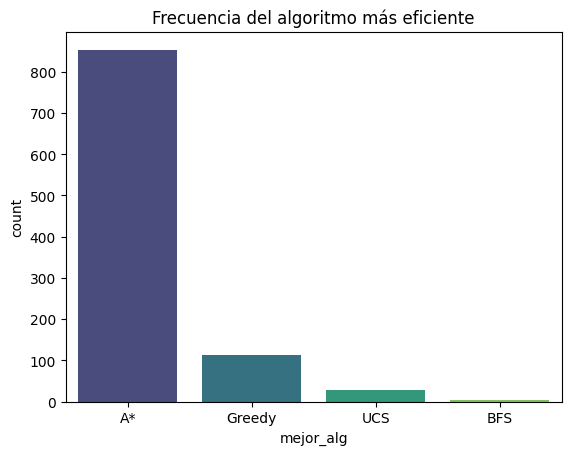

In [18]:
sns.countplot(data=df, x="mejor_alg", palette="viridis", hue="mejor_alg")
plt.title("Frecuencia del algoritmo más eficiente")
plt.show()

### 💾 2.14. Guardar el dataset

Para una revisión exaustiva y posibilidad de re-uso posterior.

In [19]:
df.to_csv("dataset_busquedas.csv", index=False)
print("Dataset guardado en 'dataset_busquedas.csv'")

Dataset guardado en 'dataset_busquedas.csv'


## 🧠 Parte 3 - Modelo con Red Neuronal (TensorFlow/Keras)

### 📚 3.1. Bibliotecas necesarias

In [20]:
!pip install tensorflow scikit-learn

### 🧩 3.2. Importaciones y configuración inicial

In [21]:
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

import pickle

### 📦 3.3 Cargar el dataset

Al cargar un dataset fijo, en lugar de simplemente tomar la variable **df** de memoria, garantizo la previsibilidad de los datos al momento del entrenamiento.

In [22]:
ds_path = "https://github.com/andres-garcia-alves/issd-dsia/raw/refs/heads/main/Proyecto-Final/miscelaneos/dataset_busquedas.csv"
# ds_path = "dataset_busquedas.csv"

df = pd.read_csv(ds_path)

In [23]:
df.sample(5)

,tamanio,costo_prom,var_costo,densidad_cost3,costo_BFS,costo_A*,costo_UCS,costo_Greedy,mejor_alg
241,5,1.520000,0.489600,0.120000,"(np.int64(11), 25, 8.559226989746094e-05)","(np.int64(9), 14, 7.295608520507812e-05)","(np.int64(9), 24, 9.608268737792969e-05)","(np.int64(14), 9, 3.5762786865234375e-05)",A*
68,8,1.640625,0.667725,0.218750,"(np.int64(24), 64, 0.0001895427703857422)","(np.int64(16), 35, 0.00021791458129882812)","(np.int64(16), 62, 0.0003094673156738281)","(np.int64(20), 15, 7.128715515136719e-05)",A*
939,4,1.500000,0.500000,0.125000,"(np.int64(9), 16, 6.532669067382812e-05)","(np.int64(6), 9, 4.8160552978515625e-05)","(np.int64(6), 15, 6.008148193359375e-05)","(np.int64(10), 7, 2.86102294921875e-05)",A*
104,5,1.320000,0.377600,0.080000,"(np.int64(14), 25, 7.796287536621094e-05)","(np.int64(8), 16, 9.012222290039062e-05)","(np.int64(8), 25, 0.00010728836059570312)","(np.int64(9), 9, 3.838539123535156e-05)",A*
548,9,1.567901,0.566377,0.160494,"(np.int64(24), 81, 0.0002315044403076172)","(np.int64(17), 44, 0.0002720355987548828)","(np.int64(17), 81, 0.00035262107849121094)","(np.int64(26), 17, 7.557868957519531e-05)",A*


### 🔹 3.4. Codificación y Normalización

In [24]:
# Codificar la variable objetivo
le = LabelEncoder()
df['mejor_alg_enc'] = le.fit_transform(df['mejor_alg'])

# Features y etiquetas
x = df[['tamanio', 'costo_prom', 'var_costo', 'densidad_cost3']]
y = df['mejor_alg_enc']

# Escalar las features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Separación de los datos en train/test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=1234) # stratify=y,

print("x_train shape:", x_train.shape)
print("Clases codificadas:", dict(zip(le.classes_, le.transform(le.classes_))))

x_train shape: (800, 4)
Clases codificadas: {'A*': np.int64(0), 'Greedy': np.int64(1), 'UCS': np.int64(2)}


### 🧱 3.5. Definición de la Red Neuronal

In [25]:
n_clases = len(le.classes_)

model = models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(n_clases, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

### 🚀 3.6. Entrenamiento del modelo

In [26]:
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2583 - loss: 1.1446 - val_accuracy: 0.7000 - val_loss: 0.9788
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7879 - loss: 0.9536 - val_accuracy: 0.8250 - val_loss: 0.8303
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8606 - loss: 0.7859 - val_accuracy: 0.8250 - val_loss: 0.7028
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8504 - loss: 0.6377 - val_accuracy: 0.8250 - val_loss: 0.6220
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8506 - loss: 0.5581 - val_accuracy: 0.8250 - val_loss: 0.5865
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8647 - loss: 0.4669 - val_accuracy: 0.8250 - val_loss: 0.5709
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8544 - loss: 0.4502 - val_accuracy: 0.8250 - val_loss: 0.5597
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8734 - loss: 0.4033 - val_accuracy: 0.8250 - va

### 📈 3.7. Visualización del entrenamiento

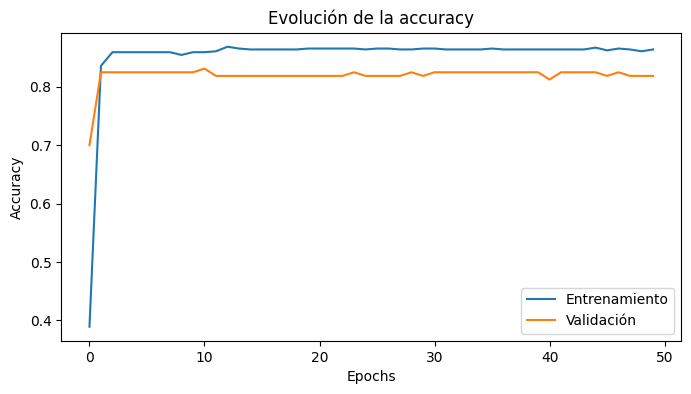

In [27]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Evolución de la accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### 🧪 3.8. Evaluación final

In [28]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Exactitud en test: {acc*100:.1f}%")

Exactitud en test: 89.5%


### 🔍 3.9. Predicciones y Matriz de Confusión

In [29]:
y_pred = np.argmax(model.predict(x_test), axis=1)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Reporte de clasificación:
              precision    recall  f1-score   support

          A*       0.90      0.99      0.94       174
      Greedy       0.78      0.33      0.47        21
         UCS       0.00      0.00      0.00         5

    accuracy                           0.90       200
   macro avg       0.56      0.44      0.47       200
weighted avg       0.87      0.90      0.87       200



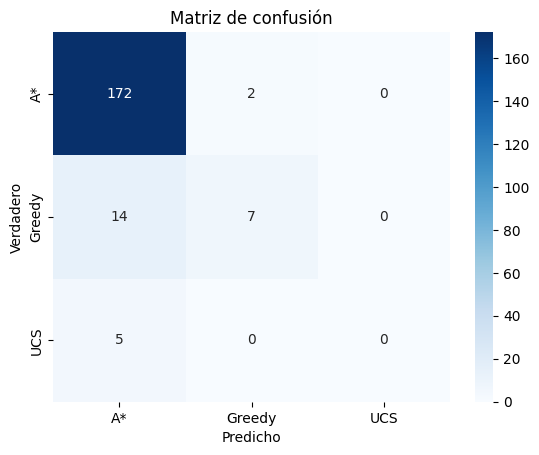

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de confusión")
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.show()

### 🧭 3.10. Exportar el modelo (para Streamlit)

In [31]:
model.save("./red_neuronal.keras")
pickle.dump((scaler, le), open("./objetos.pkl", "wb"))

## 🎮 Parte 4 - Visualización del Tablero y la Ruta

La idea es:

- Generar un nuevo tablero aleatorio.
- Calcular sus características (features).
- Hacer que la red neuronal prediga el algoritmo más conveniente.
- Ejecutar ese algoritmo y mostrar la ruta sobre el tablero con colores.

### 📚 4.1. Bibliotecas necesarias

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Image

### 📦 4.2. Función de predicción

In [33]:
# Predice el mejor algoritmo usando el modelo entrenado
def predecir_algoritmo(tablero, verbose=1):
    tamanio = tablero.shape[0]
    costo_prom = tablero.mean()
    varianza = tablero.var()
    densidad_cost3 = np.mean(tablero == 3)

    columnas = ["tamanio", "costo_prom", "var_costo", "densidad_cost3"]
    features = pd.DataFrame([[tamanio, costo_prom, varianza, densidad_cost3]], columns=columnas)

    features_scaled = scaler.transform(features)

    predicciones = model.predict(features_scaled, verbose=verbose)

    pred_alg = np.argmax(predicciones, axis=1)[0]
    pred_alg = le.inverse_transform([pred_alg])[0]
    return pred_alg, predicciones

### 🛠️ 4.3. Funciones auxiliares

In [34]:
# Ejecutar un algoritmo real sobre un tablero
def ejecutar_algoritmo(tablero, algoritmo="A*"):
  costo, nodos, tiempo, camino = None, None, None, None

  # Ejecutar el algoritmo elegido
  if alg_pred == "BFS":
      costo, nodos, tiempo, camino = busqueda_bfs(tablero_test)
  elif alg_pred == "UCS":
      costo, nodos, tiempo, camino = busqueda_generica(tablero_test, algoritmo="UCS")
  elif alg_pred == "Greedy":
      costo, nodos, tiempo, camino = busqueda_generica(tablero_test, algoritmo="Greedy")
  elif alg_pred == "A*":
      costo, nodos, tiempo, camino = busqueda_generica(tablero_test, algoritmo="A*")

  return costo, nodos, tiempo, camino

### 🗺️ 4.4. Visualizaciones del tablero

In [104]:
# Muestra el tablero, y opcionalmente el camino recorrido
def generar_tablero_estatico(tablero, camino=None, titulo="Tablero"):
    n = tablero.shape[0]
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(tablero, cmap='Blues', origin='upper')

    # mostrar los costos en las celdas
    for i in range(n):
        for j in range(n):
            ax.text(j, i, str(tablero[i,j]), ha='center', va='center', color='black', fontsize=12)

    # dibujar el camino
    if camino:
        xs, ys = zip(*camino)
        ax.plot(ys, xs, color='red', linewidth=2)

    # marcar con círculos el inicio y la meta
    ax.scatter(0, 0, c='gold', s=120, label='Inicio')
    ax.scatter(n-1, n-1, c='green', s=120, label='Meta')

    # graficar
    ax.set_title(titulo)
    ax.legend(fontsize=8)
    plt.show()

In [101]:
def generar_tablero_animado(tablero, camino, titulo="Tablero", nombre_archivo="animacion.gif"):
    n = tablero.shape[0]
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(tablero, cmap='Blues', origin='upper')

    # mostrar los costos en las celdas
    for i in range(n):
        for j in range(n):
            ax.text(j, i, str(tablero[i,j]), ha='center', va='center', color='black', fontsize=12)

    # dibujar camino y meta
    xs, ys = zip(*camino)
    ax.plot(ys, xs, color='red', linewidth=2, alpha=0.4)
    ax.scatter(0, 0, c='gold', s=120, label='Inicio')
    ax.scatter(n-1, n-1, c='green', s=120, label='Meta')

    # cargar la imagen del auto
    auto_img = mpimg.imread("auto.png")
    imagebox = OffsetImage(auto_img, zoom=0.70)
    ab = AnnotationBbox(imagebox, camino[0][::-1], frameon=False)
    ax.add_artist(ab)

    ax.set_title(titulo)
    ax.legend(fontsize=8)

    # generar interpolaciones (para un movimiento fluido)
    posiciones_interp = []
    pasos_intermedios = 10
    for (x1, y1), (x2, y2) in zip(camino[:-1], camino[1:]):
        for t in np.linspace(0, 1, pasos_intermedios, endpoint=False):
            xi = x1 + (x2 - x1) * t
            yi = y1 + (y2 - y1) * t
            posiciones_interp.append((xi, yi))
    posiciones_interp.append(camino[-1])  # último punto exacto

    # callback invocado por matplotlib por cada frame
    def update(frame):
        # borrar el auto anterior
        for artist in ax.artists: artist.remove()

        # dibujar el auto en la nueva posición
        x, y = posiciones_interp[frame]
        ab_new = AnnotationBbox(imagebox, (y, x), frameon=False)
        ax.add_artist(ab_new)

        return ab_new,

    # crear y guardar el gif de la animación
    fps = 30
    anim = FuncAnimation(fig, update, frames=len(posiciones_interp)) # 1000/fps  interval = 400, , blit=False, repeat=False
    anim.save(nombre_archivo, writer='pillow', fps=25)

    plt.close(fig)

### 🧩 4.5. Ejemplo completo

In [36]:
# Generar tablero
tablero_test = generar_tablero(n=random.choice([5,6,7]))
print("Tablero generado:")
print(tablero_test, '\n')

Tablero generado:
[[0 1 2 2 2 1]
 [1 1 1 1 2 1]
 [2 1 1 1 2 1]
 [2 2 1 2 1 1]
 [1 2 1 2 1 2]
 [3 2 1 2 2 1]] 



In [37]:
# Predicción del modelo
alg_pred, preds = predecir_algoritmo(tablero_test)
print("Clasificación:", preds, '\n')
print("Predicción de mejor algoritmo:", alg_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Clasificación: [[0.8489873  0.10147127 0.04954154]] 

Predicción de mejor algoritmo: A*


In [38]:
costo, nodos, tiempo, camino = ejecutar_algoritmo(tablero_test, algoritmo=alg_pred)
print(camino)

[(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)]



Costo total: 12, Nodos expandidos: 32


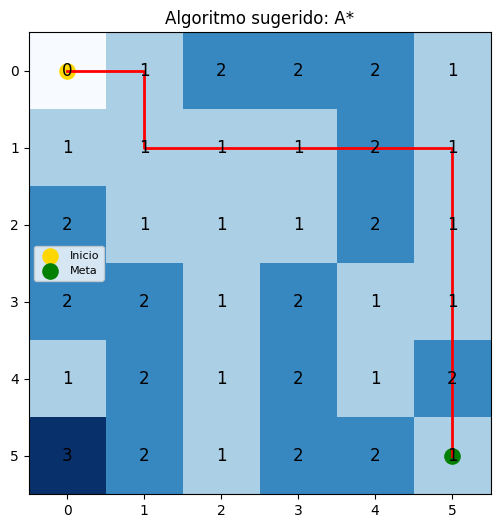

In [105]:
print(f"\nCosto total: {costo}, Nodos expandidos: {nodos}")
generar_tablero_estatico(tablero_test, camino, titulo=f"Algoritmo sugerido: {alg_pred}")

In [102]:
generar_tablero_animado(tablero=tablero_test, camino=camino, titulo=f"Algoritmo sugerido: {alg_pred}", nombre_archivo="tablero-animado.gif")


Costo total: 12, Nodos expandidos: 32


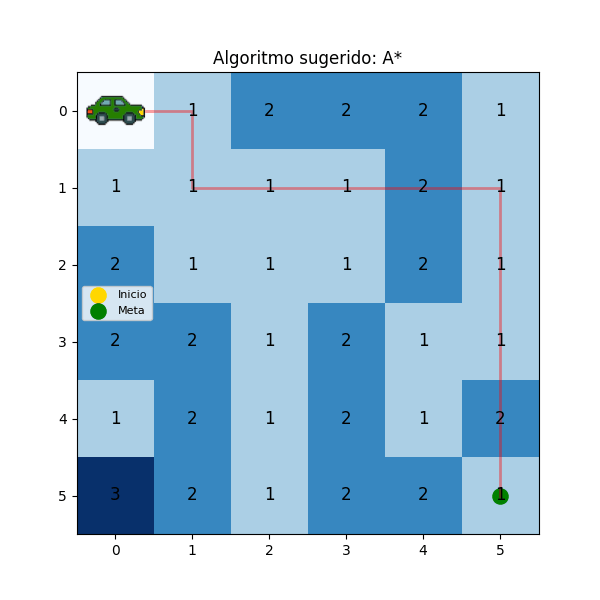

In [103]:
print(f"\nCosto total: {costo}, Nodos expandidos: {nodos}")
Image(filename="tablero-animado.gif")  # mostrar el tablero animado

Detalle del gráfico: 🖼️

* El tablero con los valores de costo en cada celda.
* Inicio (verde) y meta (amarillo).
* Camino sugerido (en rojo).
* Nombre del algoritmo elegido por la red neuronal.

## 📝 Parte 5 - Evaluación del desempeño del modelo

### 🧠 5.1. Evaluar si el modelo elige correctamente

La idea es:

- Generar varios tableros nuevos (datos que el modelo no vio durante el entrenamiento).
- Calcular cuál algoritmo realmente tiene mejor desempeño (menor costo).
- Ver si la red neuronal eligió el correcto.
- Calcular la precisión global (accuracy).

### ✅ 5.2. Evaluar Exactitud

In [ ]:
def evaluar_modelo(model, n_pruebas=100):
    aciertos = 0
    total = 0

    for _ in range(n_pruebas):
        tablero = generar_tablero(n=random.choice([5,6,7,8]))

        mejor_alg, detalles = probar_algoritmos(tablero)          # resultados reales
        pred_alg, preds = predecir_algoritmo(tablero, verbose=0)  # predicción del modelo

        if pred_alg == mejor_alg: aciertos += 1
        total += 1

    acc = aciertos / total
    return acc

In [ ]:
acc = evaluar_modelo(model, n_pruebas=100)
print(f"✅ Exactitud al elegir el mejor algoritmo: {acc*100:.1f}%")

💬 Interpretación:

* El modelo logra una precisión alrrededor del 90% al seleccionar el algoritmo que efectivamente produce el menor costo de búsqueda.

* Esto implica que aprendió una relación entre las características del entorno (tamaño, variabilidad, obstáculos) y el desempeño de cada algoritmo.

* En un sistema de GPS, donde el entorno cambia constantemente, este tipo de red podría servir como selector dinámico entre distintos métodos de planificación.

### 🧩 5.3. Estadísticas por separado

In [ ]:
from collections import Counter

def evaluar_detallado(model, n_pruebas=100):
    resultados = []

    for _ in range(n_pruebas):
        tablero = generar_tablero(n=random.choice([5,6,7,8]))

        mejor_alg, detalles = probar_algoritmos(tablero)          # resultados reales
        pred_alg, preds = predecir_algoritmo(tablero, verbose=0)  # predicción del modelo

        resultados.append((mejor_alg, pred_alg))

    reales, preds = zip(*resultados)
    acc = np.mean(np.array(reales) == np.array(preds))

    conteo = Counter(resultados)
    return conteo

In [ ]:
conteo = evaluar_detallado(model, n_pruebas=100)
conteo

In [ ]:
print(f"✅ Exactitud: {acc*100:.2f}% \n\n")

print("📈 Matriz de confusión (real vs predicho):")
conf_matrix = pd.DataFrame({
    "Predijo A*":     [conteo[('A*', 'A*')],     conteo[('A*', 'UCS')],     conteo[('A*', 'Greedy')],     conteo[('A*', 'BFS')]],
    "Predijo USC":    [conteo[("UCS", "A*")],    conteo[("UCS", "UCS")],    conteo[("UCS", "Greedy")],    conteo[('UCS', 'BFS')]],
    "Predijo Greedy": [conteo[("Greedy", "A*")], conteo[("Greedy", "UCS")], conteo[("Greedy", "Greedy")], conteo[('Greedy', 'BFS')]],
    "Predijo BFS":    [conteo[("BFS", "A*")],    conteo[("BFS", "UCS")],    conteo[("BFS", "Greedy")],    conteo[("BFS", "BFS")]]
}, index=["Real A*", "Real UCS", "Real Greedy", "BFS"])
print(conf_matrix, "\n\n")

print("📈 Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

## ✒️ Parte 6 - Conclusiones:


> El sistema combina técnicas clásicas de búsqueda (BFS, A*, UCS, Greedy) con un modelo de red neuronal entrenado sobre tableros sintéticos.  
La IA aprendió a predecir cuál algoritmo tendrá mejor desempeño según las características del entorno, funcionando como un meta-agente adaptativo.

> Análisis conceptual:  
> El entrenamiento del modelo de red neuronal se puede entender como un proceso de búsqueda en el espacio de soluciones (pesos), donde el algoritmo de optimización (Adam) actúa como un agente que minimiza la función de pérdida (loss).  
> Este proceso es análogo a los algoritmos de búsqueda informada (como A*) que exploran un espacio de soluciones guiados por una heurística (la función de pérdida, en este caso).  
> Así, el modelo aprende a seleccionar el algoritmo de búsqueda más eficiente según las características del tablero, optimizando su desempeño en base a los datos con la experiencia previa (el dataset sintético con las simulaciones).

> El sistema no solo sugiere el algoritmo más eficiente según las condiciones del entorno, sino que también muestra visualmente la solución encontrada, permitiendo observar cómo varía la trayectoria óptima según el tipo de heurística y los costos del entorno.

> Adicionalmente, de la sección de Evaluación del Desempeño, he demostrado que:
> - Los algoritmos clásicos funcionaron correctamente.
> - La red neuronal aprendió a decidir inteligentemente cuál usar según las condiciones del entorno.
> - Se integran las dos ramas de la materia: algoritmos de búsqueda y aprendizaje automático (TensorFlow/Keras).
